In [4]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
features = wine_quality.data.features 
targets = wine_quality.data.targets 
  
# variable information 
print(features) 


      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

P-value: 4.888069044201508e-22
-----RED------
++Means:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

++Std Dev:
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

-----WHITE----
++Means:
fixed acidity             6.854788
volatile acidity          0

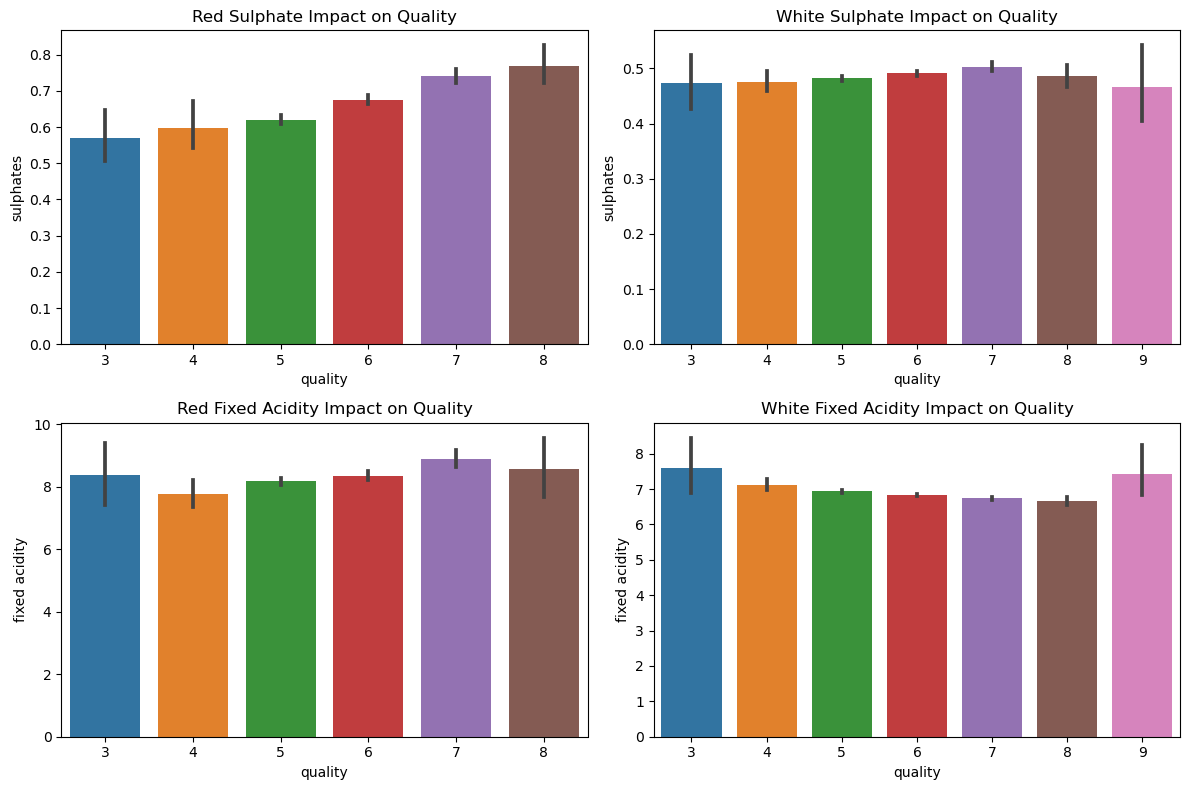

In [21]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

white = pd.read_csv('winequality/winequality-white.csv', sep=';')
red = pd.read_csv('winequality/winequality-red.csv', sep=';')
p_value(red, white)
gen_stats(red, white)
plots(red, white)

In [5]:
# Function to compare P-values between red and white wines. Using null hypothesis that there is not a difference
# in the quality of wine for red or white.
def p_value(red_df, white_df):
    # Split the data into two groups
    white_quality = white_df['quality']
    red_quality = red_df['quality']

    # use scipy to calculate ttest
    t_stat, p_value = stats.ttest_ind(white_quality, red_quality)

    # Use default alpha
    alpha = 0.05

    print(f"P-value: {p_value}")

In [12]:
# General stats
def gen_stats(red_df, white_df):

    # Calculate the means of each feature
    red_means = red_df.mean()
    white_means = white_df.mean()
    
    # Calculate the std. dev of each feature
    red_std_dev = red_df.std()
    white_std_dev = white_df.std()

    # Print the means
    print("-----RED------")
    print("++Means:")
    print(red_means)
    print("\n++Std Dev:")
    print(red_std_dev)
    print("\n-----WHITE----")
    print("++Means:")
    print(white_means)
    print("\n++Std Dev:")
    print(white_std_dev)

In [20]:
# Plot comparison between Red and White sulphate impact on quality
# Plot Comparison between Red and White acidity impact on quality
def plots(red_df, white_df):
    plt.figure(figsize = (12,8))
    plt.subplot(2, 2, 1)
    sns.barplot(x = 'quality', y = 'sulphates', data = red_df).set(title='Red Sulphate Impact on Quality')
    plt.subplot(2, 2, 2)
    sns.barplot(x = 'quality', y = 'sulphates', data = white_df).set(title='White Sulphate Impact on Quality')
    plt.subplot(2, 2, 3)
    sns.barplot(x = 'quality', y = 'fixed acidity', data = red_df).set(title='Red Fixed Acidity Impact on Quality')
    plt.subplot(2, 2, 4)
    sns.barplot(x = 'quality', y = 'fixed acidity', data = white_df).set(title='White Fixed Acidity Impact on Quality')
    plt.tight_layout()
    plt.show()